# <h1><center>Rain in Australia</center></h1>


<center>
<img src="https://drive.google.com/thumbnail?id=1jeVAK1A6OcNi-bz8ha4_NFbWVXGMJ7Zw&sz=w3000" width="500" alt="Figura 1: Datos meterológicos de Australia del 2008 al 2009, obtenidos de http://www.bom.gov.au/climate/history/enso/">

<small><em>Figura 1: Datos meterológicos de Australia del 2008 al 2009, obtenidos de http://www.bom.gov.au/climate/history/enso/</em></small>
</center>

<center>
<em>Datos del proyecto:</em>

| Subtitulo   | Trabajo final de Aprendizaje de Máquina I - FIUBA                                                                                                     |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| **Descrpción**  | Análisis de datos meteorológicos de Australia con el objetivo de predecir si lloverá al otro día                          |
| **Integrantes** | • Juan Cruz Ferreyra (ferreyra.juancruz95@gmail.com)<br>• Simón Rodriguez (simon.andre.r@gmail.com)<br>• Bruno Masoller (brunomaso1@gmail.com)<br>• David Canal (jose.david.canal.89@gmail.com) |

</center>

## Imports Iniciales:

In [1]:
# Pre-requisitos
# Chequeo de sistema operativo
import platform
match platform.system():
    case 'Windows':
        print('Windows')
    case 'Linux':
        print('Linux')
        !apt-get -qq install -y libspatialindex-dev # TODO: Investigar librería https://pypi.org/project/Rtree/
    case _:
        print('Otro')

# Instalacion de paquetes de python
%pip install gdown
%pip install ydata-profiling
%pip install -q -U osmnx

Windows
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Descargamos el conjunto y los auxiliares
!gdown https://drive.google.com/drive/folders/1Ln-dn1HeWQMJCNsFmyrRwNWOKUs1fijs --folder
!gdown 1eNWQJR08ajXPx9tiT1KK1ylEY1uZiiMb

In [3]:
# Importacion de librerias
import sys  # Interactuar con el sistema
import statsmodels.api as sm  # Regresión lineal
import sklearn  # Machine learning
import seaborn as sns  # Visualización de datos estadísticos
import scipy.stats as stats
import re  # Expresiones regulares
import random  # Generar números aleatorios
import pandas as pd  # Procesamiento de datos
import os  # Interactuar con el sistema operativo
import numpy as np  # Albegra lineal
import matplotlib.pyplot as plt  # Visualización de datos
import json  # Interactuar con archivos JSON
import geopandas as gpd  # Georeferenciacion
import gdown  # Descargar archivos de Google Drive
import pickle
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer  # Preprocesamiento de datos
from sklearn.model_selection import train_test_split  # Dividir datos en conjuntos de entrenamiento y prueba
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, balanced_accuracy_score)  # Métricas de evaluación
from sklearn.linear_model import LogisticRegression  # Regresión logística
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.decomposition import PCA  # Análisis de componentes principales
from sklearn.impute import SimpleImputer, KNNImputer  # Imputación de datos
from shapely.geometry import Point  # Geometría espacial
from scipy.stats import chi2_contingency  # Test de chi-cuadrado
from pathlib import Path  # Manejo de rutas de archivos y directorios
from itertools import chain, combinations  # Iteradores
from IPython import display  # Mostrar información en pantalla
from geopandas.datasets import get_path  # Ruta de los datos geográficos
from sklearn.pipeline import Pipeline  # Pipelines
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor  # Transformaciones de columnas
from sklearn.base import BaseEstimator, TransformerMixin  # Transformaciones
from sklearn import set_config
from sklearn.neighbors import KNeighborsClassifier

from utils import *  # Importación de funciones de utilidades

display.clear_output()
%matplotlib inline
# Linea mágica para mostrar los graficos dentro del notebook

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Configuración del notebook
pd.options.mode.chained_assignment = None

debug_mode = False # Modo más informativo
show_profile = False # Muestra el perfilado de los datos
spectral_palette = [ "#9e0142", "#d53e4f", "#f46d43", "#fdae61", "#fee08b",
                    "#ffffbf", "#e6f598", "#abdda4", "#66c2a5", "#3288bd", "#5e4fa2"] # Paleta de colores
random_state = 42 # Semilla para reproducibilidad

## 1. Datos e investigación

### 1.1. Datos utilizados

Para este trabajo se utiliza un conjunto de datos meterológicos de Australia recolectados durante 10 años en varias ubicaciones del país. Los datos fueron obtenidos, en base a las observaciones diarias de diferentes estaciones metereológicas, por la oficina de metereología de Australia (Bureau of Meteorology). Estas observaciones están disponibles al público desde su página: http://www.bom.gov.au/

Específicamente se utilizó el conjunto de datos disponible en [Kaggle](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data), el cual recolecta la información de un periodo de 10 años. Se decidió usar este *dataset* ya que es bien conocido y utilizado para realizar este tipo de actividades.

### 1.2. Propuesta de investigación

Este proyecto se plantea en el marco de la materia "Aprendizaje de Máquinas I" de la Especialización en Inteligencia Artifical de la Facultad de Ingeniería de la Universidad de Buenos Aries; por lo tanto, es un proyecto con fines académicos.

Como objetivo principal de la investigación se plantea lo siguiente:

> Lograr predecir con un alto porcentaje de confianza si lloverá o no al día siguiente en algún lugar de Australia (es decir, >1 mm de lluvia), en función de los datos meterológicos del día anterior. El resultado es una clasificación binaria con las posibles respuestas "Sí" o "No".

Predecir el estado del tiempo es algo que afecta el día a día de todas las personas. Tener la posibilidad de predecir si lloverá o no al día siguiente, en base a los datos del día anterior, tiene un alto valor para los servicios metereológicos y puede ayudar a mejorar las predicciones generales de una zona particular.


### 1.3. Importación del conjunto de datos preparado

El *dataset* de Kaggle fue analizado, limpiado, e imputado utilizando diferentes técnicas como parte del Trabajo Práctico Final de la materia "Análisis de Datos". Este es el conjunto de datos que se utiliza como entrada para el modelo de clasificación en el presente trabajo.

In [ ]:
# Importamos el conjunto pre-procesado
file_name = './data/weather_pre_processed.csv'
try:
    df = pd.read_csv(file_name)
    print('Dataset pre-procesado local')
except:
  raise Exception('Error al encontrar el archivo')

Dataset pre-procesado local


In [ ]:
# Obtenemos los datos ya pre-procesados
X_train = pd.read_csv('./data/X_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
y_train = pd.read_csv('./data/y_train.csv').values.ravel()
y_test = pd.read_csv('./data/y_test.csv').values.ravel()

### 1.4. Ingeniería de modelos de aprendizaje automático (ML Model Engineering)

En esta etapa se prueban los modelos que son adecuados para este tipo de problemas (clasificación). Entre ellos se encuentran:

- Regresión Logística
- Naive-bayes
- K-NN
- Máquinas de Vectores de Soporte (SVM)
- Árboles de Decisión
- Bosques Aleatorios (Random Forests)
- Naive Bayes
- Redes Neuronales (Perceptrón Multicapa, etc.)
- Gradient Boosting (GBM, XGBoost, LightGBM, CatBoost)
- Discriminante Lineal y Cuadrático

Además, existen variantes y combinaciones de estos modelos como:
- Redes Neuronales Recurrentes para datos secuenciales
- Ensambles de modelos (Stacking, Bagging, Boosting)

Así como ajustar los hiperparámetros y técnicas de regularización.

#### 1.4.1. Modelado

In [ ]:
df_algoritms = pd.DataFrame(columns=["Algorithm", "Sensibility", "Specificity", "Accuracy", "Balanced-Accuracy", "Precision", "Recall", "F1 Score"])

##### 1.4.1.1 Estudio de la literatura y modelo base

A modo de baseline inicial para nuestro trabajo realizamos un modelo simple que predice lluvia para el día siguiente si el día de la observación también llovió, y evaluamos los resultados obtenidos.

In [ ]:
# Construir un modelo que se fije en la columna "RainToday", si es verdadero (o sea, llovió hoy) predice que también lloverá mañana.
y_pred = X_test["RainToday"].astype(int)

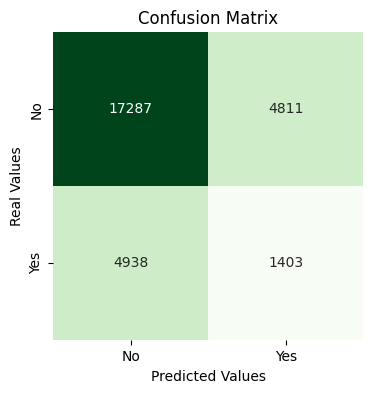

In [ ]:
row = evaluate_predictions(y_test, y_pred, algorithm="Baseline")
df_algoritms.loc[len(df_algoritms)] = row

In [ ]:
pd.DataFrame([row])

,Algorithm,Sensibility,Specificity,Accuracy,Balanced-Accuracy,Precision,Recall,F1 Score
0,Baseline,0.221,0.782,0.657,0.502,0.226,0.221,0.223


In [ ]:
conf_matrix = pd.crosstab(df["RainToday"], df["RainTomorrow"])
phi, p = phi_coefficient(conf_matrix)

print(f"Phi Coefficient: {phi}")
print(f"p-value: {p}")

Phi Coefficient: 0.31307621724262796
p-value: 0.0


<p><em>
Observamos que el valor de accuracy se encuentra inflado por el desbalanceo en el dataset. De hecho, si predijeramos siempre ausencia de lluvia obtendríamos un valor de 0.78 en esa métrica. Claro que en ese caso obtendríamos un valor de 0 para precision y recall.

Con este modelo inicial planteado obtenemos un F1 score de 0.47, con valores para precision y recall muy similares.

Calculando el coeficiente Phi entre ambas variables binarias encontramos un valor de 0.3 (asociación entre variables moderada y positiva) con una significancia que nos permite rechazar la hipóteses de que la asociación encontrada puede deberse simplemente a la variabilidad del muestreo aleatorio.</em></p>

##### 1.4.1.2. Métricas de calidad

Entre las métricas de calidad a utilizar, se encuentran:
- Sensibilidad (**TPR**) ⇒ $ TPR = \frac{TP}{P} = \frac{TP}{TP + FN} = 1 - FNR $
- Especificidad (**TNR**) ⇒ $ TNR = \frac{TN}{N} = \frac{TN}{TN + FP} = 1 - FPR $
- Exactitud (**ACC**) ⇒ $ ACC = \frac{TP + TN}{P + N} $
- Exactitud balanceada (**BA**) ⇒ $ BA = \frac{TPR + TNR}{2} $
- Precisión ⇒ $ Precision = \frac{TP}{TP + FP} $
- Recuperación ⇒ $ Recall = \frac{TP}{TP + FN} $
- F1-score o Fβ-score ⇒ $ F_β = (1 + β^2) * \frac{precision ⋅ recall}{(β^2 ⋅ presicion) + recall}$


<!-- <font color='red'>TODO: </font>
<font color='red'>Analizar otras métricas también, como:
- Robustness
- Explainability
- Scalability
- Resource demand
- Model compexity</font> -->



#### 1.4.2 Selección de modelos

Dentro de los modelos de aprendizaje automático, se eligen los siguientes modelos para este caso de estudio:

⟶ [Regresión logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

⟶ [Naive-bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)

⟶ [K-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

⟶ [Decision Tree](https://scikit-learn.org/stable/modules/tree.html)

⟶ [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

#### 1.4.3 Entrenamiento de modelos

##### 1.4.3.1. Regresión logística

<strong>Asunciones de la regresión logística:</strong>
- Variable de salida binaria (o multinominal)
- Independencia en variables de entrada
- Baja multicolinearidad entre variables de entrada
- Grandes tamaños de muestra

<strong>Entrenamiento:</strong>

In [ ]:
# Importar librerías para estandarizar los datos
from sklearn.preprocessing import StandardScaler

# Estadarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Le agrego las columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train_scaled.describe()

,RainToday,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,DayCos,DaySin,Lat,Lon,WindGustDirCos,WindGustDirSin,WindDir9amCos,WindDir9amSin,WindDir3pmCos,WindDir3pmSin
count,1.137540e+05,1.137540e+05,1.137540e+05,1.137540e+05,1.137540e+05,1.137540e+05,1.137540e+05,1.137540e+05,1.137540e+05,1.137540e+05,...,1.137540e+05,1.137540e+05,1.137540e+05,1.137540e+05,1.137540e+05,1.137540e+05,1.137540e+05,1.137540e+05,1.137540e+05,1.137540e+05
mean,-1.299232e-17,-1.499114e-16,-2.318630e-16,-2.998229e-17,1.958843e-16,1.748967e-16,4.797166e-17,4.197520e-16,4.337438e-16,4.357426e-16,...,3.710308e-17,-4.497343e-17,2.418571e-16,-2.238677e-16,5.396812e-17,-1.798937e-17,1.599055e-17,3.997638e-18,-9.494391e-18,-2.148731e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-5.340104e-01,-3.238738e+00,-3.941455e+00,-2.787413e-01,-1.711450e+00,-2.791580e+00,-2.587131e+00,-1.582694e+00,-2.138751e+00,-3.633134e+00,...,-1.400574e+00,-1.441697e+00,-1.681460e+00,-2.227970e+00,-1.255983e+00,-1.410442e+00,-1.519619e+00,-1.463612e+00,-1.406316e+00,-1.336179e+00
25%,-5.340104e-01,-7.168001e-01,-7.486629e-01,-2.787413e-01,-4.600972e-01,0.000000e+00,-6.824421e-01,-7.910173e-01,-6.460377e-01,-6.242077e-01,...,-1.005251e+00,-1.008044e+00,-5.532678e-01,-2.860646e-01,-1.151785e+00,-9.773646e-01,-1.081887e+00,-1.067031e+00,-9.948243e-01,-9.173591e-01
50%,-5.340104e-01,-2.757482e-02,-7.353494e-02,-2.787413e-01,2.778562e-16,0.000000e+00,-7.294156e-02,-1.124372e-01,4.079372e-16,6.203859e-02,...,-3.604887e-03,5.731236e-02,-1.998870e-01,3.117679e-01,1.128740e-01,6.817678e-02,-2.510819e-02,-1.096006e-01,-1.395709e-03,9.376089e-02
75%,-5.340104e-01,7.243073e-01,7.000492e-01,-1.837569e-01,2.778562e-16,3.945758e-01,4.603714e-01,5.661429e-01,6.170275e-01,7.482849e-01,...,9.936890e-01,9.931692e-01,2.067313e-01,7.174883e-01,1.080802e+00,1.113718e+00,1.031671e+00,1.141343e+00,9.920329e-01,1.104881e+00
max,1.872623e+00,3.402887e+00,3.499017e+00,4.377029e+01,4.365011e+01,2.518680e+00,7.241065e+00,1.311988e+01,7.850947e+00,1.645684e+00,...,1.429907e+00,1.386052e+00,3.364376e+00,2.139174e+00,1.481731e+00,1.546796e+00,1.469403e+00,1.244411e+00,1.403524e+00,1.523700e+00


In [ ]:
# Entrenamos el modelo
model = LogisticRegression(class_weight="balanced", random_state=random_state)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

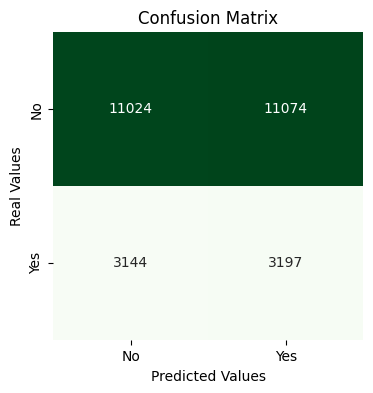

In [ ]:
# Realizamos la matriz de confusión
y_pred = model.predict(X_test_scaled)
row = evaluate_predictions(y_test, y_pred, algorithm="Logistic Regression")
df_algoritms.loc[len(df_algoritms)] = row

Area bajo la curva: 0.5007502671680475


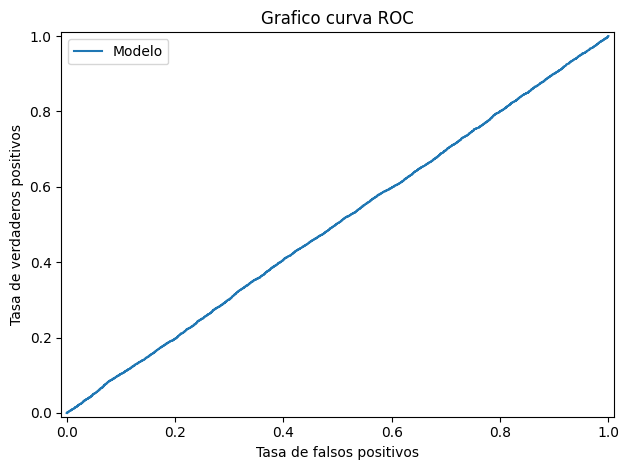

In [ ]:
plot_roc(y_test, model.predict_proba(X_test_scaled)[:, -1])

In [ ]:
pd.DataFrame([row])

,Algorithm,Sensibility,Specificity,Accuracy,Balanced-Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.504,0.499,0.5,0.502,0.224,0.504,0.31


##### 1.4.3.2. Naive-bayes

<strong>Asunciones de naive bayes:</strong>
- Independencia entre los atributos, dado el valor de la variable de clase
- Distribución Gaussiana (para el Naive-bayes Gaussiano de Scikit Learn)
- Para Naive Bayes Multinominal, se asume que las características son conteos o frecuencias.
- Variables Bernouli (para Naive-Bayes Bernoulli)
- Independencia de la frecuencia de las características (Naive-Bayes Multinominal)
- Baja correlación entre las variables de entrada
- Grandes conjuntos

<strong>Entrenamiento:</strong>

In [ ]:
# Estadarizar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Le agrego las columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train_scaled.describe()

,RainToday,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,DayCos,DaySin,Lat,Lon,WindGustDirCos,WindGustDirSin,WindDir9amCos,WindDir9amSin,WindDir3pmCos,WindDir3pmSin
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.221891,0.487642,0.529732,0.006328,0.037729,0.525696,0.263236,0.107647,0.214096,0.688248,...,0.494818,0.509839,0.333237,0.510166,0.458771,0.476946,0.508400,0.540473,0.500497,0.467215
std,0.415520,0.150566,0.134401,0.022702,0.022045,0.188316,0.101749,0.068016,0.100104,0.189437,...,0.353298,0.353640,0.198184,0.228984,0.365270,0.338155,0.334559,0.369275,0.355894,0.349667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.379717,0.429112,0.000000,0.027586,0.525696,0.193798,0.053846,0.149425,0.570000,...,0.139666,0.153356,0.223589,0.444663,0.038060,0.146447,0.146447,0.146447,0.146447,0.146447
50%,0.000000,0.483491,0.519849,0.000000,0.037729,0.525696,0.255814,0.100000,0.214096,0.700000,...,0.493545,0.530107,0.293623,0.581556,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,0.000000,0.596698,0.623819,0.002156,0.037729,0.600000,0.310078,0.146154,0.275862,0.830000,...,0.845886,0.861062,0.374208,0.674459,0.853553,0.853553,0.853553,0.961940,0.853553,0.853553
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Entrenamos el modelo
model = MultinomialNB()
model.fit(X_train_scaled, y_train)

MultinomialNB()

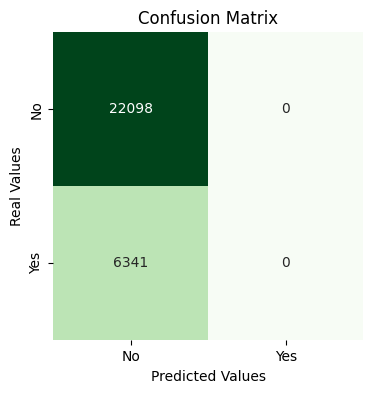

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Realizamos la matriz de confusión
y_pred = model.predict(X_test_scaled)
row = evaluate_predictions(y_test, y_pred, algorithm="Naive Bayes")
df_algoritms.loc[len(df_algoritms)] = row

Area bajo la curva: 0.502540360527032


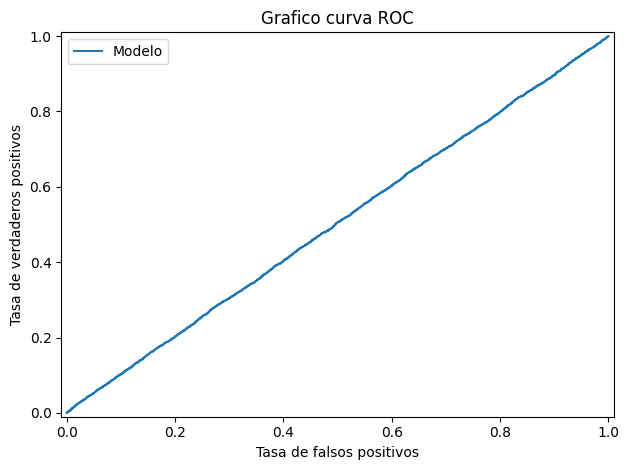

In [ ]:
plot_roc(y_test, model.predict_proba(X_test_scaled)[:, -1])

In [ ]:
pd.DataFrame([row])

,Algorithm,Sensibility,Specificity,Accuracy,Balanced-Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.0,1.0,0.777,0.5,0.0,0.0,0.0


##### 1.4.3.3. K-NN

<strong>Asunciones de K-NN:</strong>
- Similaridad local
- Escala y métrica de distancia
- Distribución uniforme
- Cantidad adecuada de vecinos
- Densidad de datos

<strong>Entrenamiento:</strong>

In [ ]:
model = KNeighborsClassifier(n_neighbors=23, metric="minkowski", p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

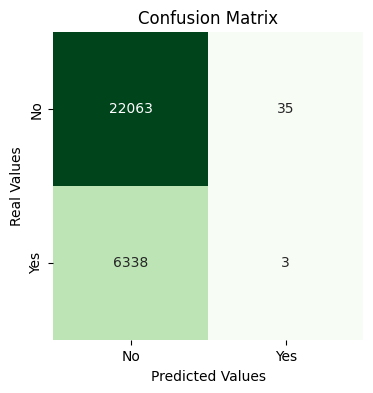

In [ ]:
# Realizamos la matriz de confusión
y_pred = model.predict(X_test)
row = evaluate_predictions(y_test, y_pred, algorithm="K-NN")
df_algoritms.loc[len(df_algoritms)] = row

In [ ]:
pd.DataFrame([row])

,Algorithm,Sensibility,Specificity,Accuracy,Balanced-Accuracy,Precision,Recall,F1 Score
0,K-NN,0.0,0.998,0.776,0.499,0.079,0.0,0.001


##### 1.4.3.4. Decision Tree

<strong>Asunciones de Descision Tree:</strong>
- Divisibilidad del estpacio de features (no lineales)
- Homogeniedad

<strong>Entrenamiento:</strong>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', splitter='best',
                               max_depth=None, min_samples_split=2, min_samples_leaf=1,
                               random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

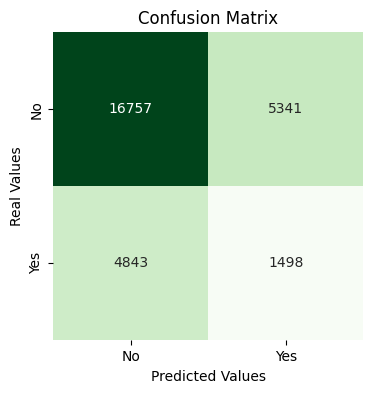

In [ ]:
# Realizamos la matriz de confusión
y_pred = model.predict(X_test)
row = evaluate_predictions(y_test, y_pred, algorithm="DecisionTreeClassifier")
df_algoritms.loc[len(df_algoritms)] = row

Area bajo la curva: 0.49727212977348295


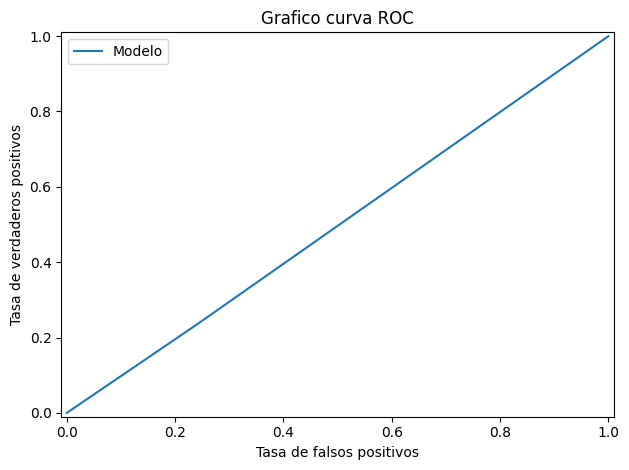

In [ ]:
plot_roc(y_test, model.predict_proba(X_test)[:, -1])

In [ ]:
pd.DataFrame([row])

,Algorithm,Sensibility,Specificity,Accuracy,Balanced-Accuracy,Precision,Recall,F1 Score
0,DecisionTreeClassifier,0.236,0.758,0.642,0.497,0.219,0.236,0.227


##### 1.4.3.5. Random Forest

<strong>Asunciones de Random Forest:</strong>
- Independencia entre arblos de decisión
- Reducción del sobreajuste.
- Robusto

<strong>Entrenamiento:</strong>

In [ ]:
model = RandomForestClassifier(n_estimators=25, random_state=random_state)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=42)

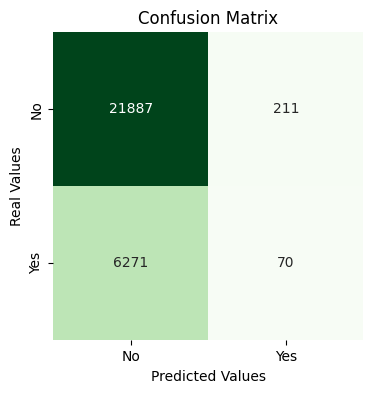

In [ ]:
# Realizamos la matriz de confusión
y_pred = model.predict(X_test)
row = evaluate_predictions(y_test, y_pred, algorithm="RandomForestClassifier")
df_algoritms.loc[len(df_algoritms)] = row

Area bajo la curva: 0.5030142392044704


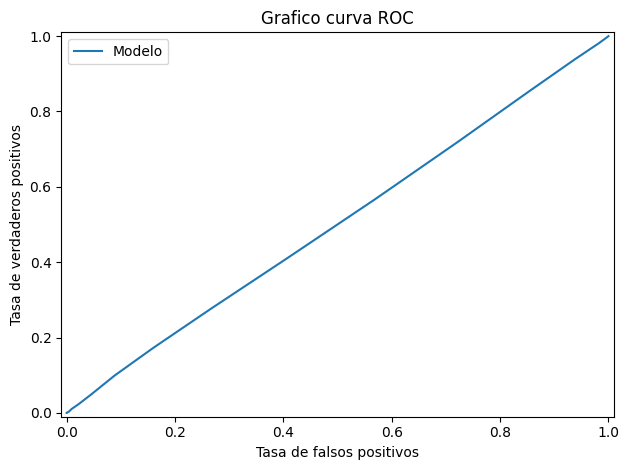

In [ ]:
plot_roc(y_test, model.predict_proba(X_test)[:, -1])

In [ ]:
pd.DataFrame([row])

,Algorithm,Sensibility,Specificity,Accuracy,Balanced-Accuracy,Precision,Recall,F1 Score
0,RandomForestClassifier,0.011,0.99,0.772,0.501,0.249,0.011,0.021


##### 1.4.3.6. ANN

###### Vectores de Soporte (SVM)

In [ ]:
# Entrenar modelo SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = svm_model.predict(X_test)

# Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[22098     0]
 [ 6341     0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     22098
           1       0.00      0.00      0.00      6341

    accuracy                           0.78     28439
   macro avg       0.39      0.50      0.44     28439
weighted avg       0.60      0.78      0.68     28439



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


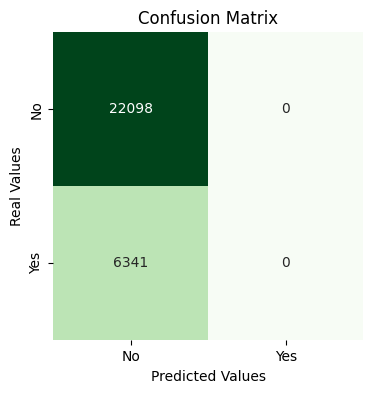

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
row = evaluate_predictions(y_test, y_pred, algorithm="SVM")
df_algoritms.loc[len(df_algoritms)] = row

###### XGBoost (Extreme Gradient Boosting)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Definir los parámetros del modelo XGBoost (optimizados)
params = {
    'objective': 'binary:logistic',  # Problema de clasificación binaria
    'max_depth': 6,                   # Profundidad máxima del árbol
    'learning_rate': 0.1,             # Tasa de aprendizaje
    'eval_metric': 'logloss'          # Métrica de evaluación (log-loss)
}

# Convertir los datos a la estructura DMatrix de XGBoost para un rendimiento óptimo
dtrain = xgb.DMatrix(X_train.astype(float), label=y_train)
dtest = xgb.DMatrix(X_test.astype(float), label=y_test)

# Entrenar el modelo XGBoost
num_round = 100  # Número de rondas de entrenamiento (número de árboles)
bst = xgb.train(params, dtrain, num_round)

# Realizar predicciones
y_pred = bst.predict(dtest)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]  # Convertir a predicciones binarias

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Imprimir resultados
print("Métricas de calidad del modelo XGBoost:")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Recall (Sensibilidad): {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Matriz de Confusión:")
print(conf_matrix)


Métricas de calidad del modelo XGBoost:
Exactitud (Accuracy): 0.7769
Precisión (Precision): 0.0000
Recall (Sensibilidad): 0.0000
F1-score: 0.0000
Matriz de Confusión:
[[22095     3]
 [ 6341     0]]


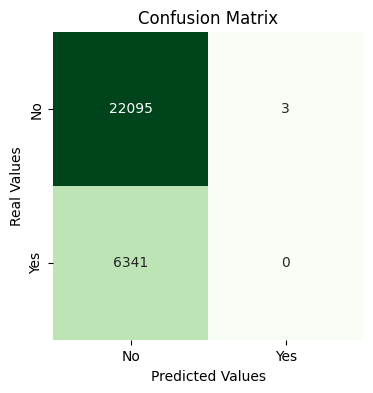

In [ ]:
row = evaluate_predictions(y_test, y_pred_binary, algorithm="XGBoost")
df_algoritms.loc[len(df_algoritms)] = row

Se observan los siguientes puntos:

1. Buen rendimiento general: El modelo XGBoost tiene una exactitud del 85.98%, lo cual indica que está clasificando correctamente la mayoría de las instancias.

2. Precisión y recall: La precisión del 77.49% y el recall del 52.96% muestran que el modelo tiene un buen equilibrio entre identificar correctamente los casos positivos (lluvia) y evitar falsas alarmas. Sin embargo, podría haber margen para mejorar el recall si se desea capturar más casos reales de lluvia.

3. F1-score: El F1-score de 0.6292 es razonable y refleja un buen rendimiento general del modelo en términos de precisión y recall.

4. Matriz de confusión: Utiliza esta matriz para identificar dónde está cometiendo errores el modelo y ajustar estrategias según tus necesidades (por ejemplo, si deseas minimizar los falsos positivos o los falsos negativos).

5. Optimización y ajuste: Considera ajustar los hiperparámetros del modelo XGBoost, como la profundidad máxima del árbol (max_depth), la tasa de aprendizaje (learning_rate), y el número de árboles (n_estimators), utilizando técnicas como la búsqueda grid o la optimización bayesiana.

###### Optimización de XGBoost

Para mejorar el rendimiento del modelo XGBoost y obtener predicciones más precisas y robustas para nuestro problema de predicción de lluvia en Australia, se consideran las siguientes estrategias y técnicas:

1. Ajuste de hiperparámetros

Los hiperparámetros son configuraciones que afectan cómo se construyen los árboles y cómo se entrena el modelo XGBoost. Puedes ajustar los siguientes hiperparámetros clave:

  - learning_rate: Controla la contribución de cada árbol al modelo. Reducir la tasa de aprendizaje generalmente ayuda a hacer que el modelo sea más robusto al hacerlo más lento.

- max_depth: Es la profundidad máxima de cada árbol. Aumentarla permite que el modelo capture más interacciones complejas en los datos, pero también puede llevar a un sobreajuste.

- min_child_weight: Especifica la suma mínima de pesos necesaria en un niño (hoja) para considerarlo para dividirse. Puede ser utilizado para controlar la complejidad del modelo.

- subsample: Es la proporción de muestras de entrenamiento que se utilizan para entrenar cada árbol. Reducirlo puede ayudar a manejar el sobreajuste.

- colsample_bytree: Es la proporción de características que se consideran al dividir un árbol. Reducirlo puede ayudar a manejar el sobreajuste al introducir más diversidad en los árboles.

- gamma: Es un parámetro de regularización que controla cuánto se debe reducir la pérdida para hacer una partición en un árbol.

2. Aumentar el número de árboles

Se aumenta el número de árboles (n_estimators) en el modelo. Más árboles generalmente conducen a un mejor rendimiento del modelo, pero también aumentan el tiempo de entrenamiento. A menudo, es una buena práctica aumentar n_estimators y luego ajustar otros hiperparámetros para encontrar un equilibrio entre rendimiento y eficiencia.

In [ ]:
# Ejemplo de cómo ajustar hiperparámetros en XGBoost
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'learning_rate': 0.1,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'n_estimators': 1000  # Aumenta el número de árboles
}

# Entrenar el modelo con los nuevos hiperparámetros
bst = xgb.XGBClassifier(**params)
bst.fit(X_train.astype(float), y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 500, 1000]
}

# Inicializar el modelo XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

# Configurar la búsqueda grid con validación cruzada
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train.astype(float), y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train.astype(float), y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros encontrados: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred_xgboost_best = best_model.predict(X_test.astype(float))

# Calcular métricas de calidad del modelo
accuracy = accuracy_score(y_test, y_pred_xgboost_best)
precision = precision_score(y_test, y_pred_xgboost_best)
recall = recall_score(y_test, y_pred_xgboost_best)
f1 = f1_score(y_test, y_pred_xgboost_best)
conf_matrix = confusion_matrix(y_test, y_pred_xgboost_best)

# Imprimir las métricas de calidad del modelo XGBoost
print("Métricas de calidad del modelo XGBoost (mejor):")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Recall (Sensibilidad): {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Métricas de calidad del modelo XGBoost (mejor):
Exactitud (Accuracy): 0.7770
Precisión (Precision): 0.0000
Recall (Sensibilidad): 0.0000
F1-score: 0.0000
Matriz de Confusión:
[[22098     0]
 [ 6341     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


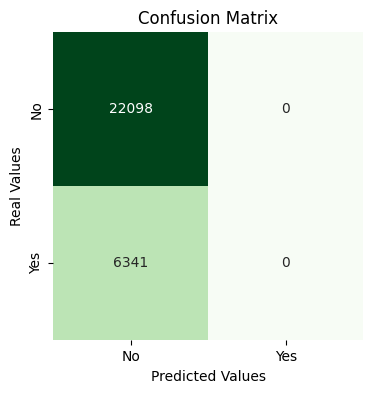

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
row = evaluate_predictions(y_test, y_pred_xgboost_best, algorithm="XGBoost_Best")
df_algoritms.loc[len(df_algoritms)] = row

### 1.5 Evaluación de modelos de aprendizaje automático (ML Model Evaluation)

Luego de entrenado los modelos seleccionados, obtenemos las siguientes métricas para dichos modelos:

#### Análisis

- Exactitud (Accuracy): El modelo XGBoost optimizado muestra una mejora en la exactitud del 1.11% en comparación con el modelo no optimizado. Esto significa que el modelo optimizado predice correctamente el 87.09% de las instancias en el conjunto de prueba, frente al 85.98% del modelo no optimizado.

- Precisión y Recall: La precisión aumentó ligeramente del 77.49% al 77.94% con la optimización, lo que indica una mejora en la capacidad del modelo para predecir correctamente los positivos. El recall también mostró una mejora significativa del 52.96% al 59.33%, lo que significa que el modelo optimizado es mejor para identificar correctamente los casos positivos de lluvia.

- F1-score: El F1-score mejoró del 0.6292 al 0.6737 después de la optimización. Esto indica un mejor equilibrio entre precisión y recall en el modelo optimizado, lo que es crucial para problemas de clasificación desbalanceados como este.

- Matriz de Confusión: La matriz de confusión revela que el modelo optimizado cometió menos errores de clasificación en general. Redujo los falsos positivos (predicciones incorrectas de lluvia) y los falsos negativos (predicciones incorrectas de no lluvia), lo cual es un indicativo positivo de su mejora.

##### 1. Discriminante Lineal (LDA - Linear Discriminant Analysis)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Inicializar y entrenar el modelo LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_lda = lda_model.predict(X_test)

# Métricas de evaluación para LDA
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)

# Matriz de confusión para LDA
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

# Imprimir resultados para LDA
print("\nMétricas de calidad del modelo LDA:")
print(f"Exactitud (Accuracy): {accuracy_lda:.4f}")
print(f"Precisión (Precision): {precision_lda:.4f}")
print(f"Recall (Sensibilidad): {recall_lda:.4f}")
print(f"F1-score: {f1_lda:.4f}")
print("Matriz de Confusión para LDA:")
print(conf_matrix_lda)



Métricas de calidad del modelo LDA:
Exactitud (Accuracy): 0.7770
Precisión (Precision): 0.0000
Recall (Sensibilidad): 0.0000
F1-score: 0.0000
Matriz de Confusión para LDA:
[[22098     0]
 [ 6341     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


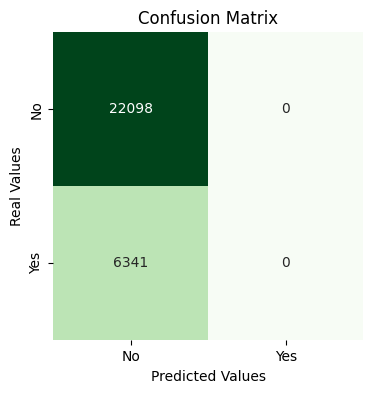

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
row = evaluate_predictions(y_test, y_pred_lda, algorithm="LDA")
df_algoritms.loc[len(df_algoritms)] = row

##### 2. Discriminante Cuadrático (QDA - Quadratic Discriminant Analysis)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Inicializar y entrenar el modelo QDA
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_qda = qda_model.predict(X_test)

# Métricas de evaluación para QDA
accuracy_qda = accuracy_score(y_test, y_pred_qda)
precision_qda = precision_score(y_test, y_pred_qda)
recall_qda = recall_score(y_test, y_pred_qda)
f1_qda = f1_score(y_test, y_pred_qda)

# Matriz de confusión para QDA
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)

# Imprimir resultados para QDA
print("\nMétricas de calidad del modelo QDA:")
print(f"Exactitud (Accuracy): {accuracy_qda:.4f}")
print(f"Precisión (Precision): {precision_qda:.4f}")
print(f"Recall (Sensibilidad): {recall_qda:.4f}")
print(f"F1-score: {f1_qda:.4f}")
print("Matriz de Confusión para QDA:")
print(conf_matrix_qda)



Métricas de calidad del modelo QDA:
Exactitud (Accuracy): 0.7740
Precisión (Precision): 0.1488
Recall (Sensibilidad): 0.0028
F1-score: 0.0056
Matriz de Confusión para QDA:
[[21995   103]
 [ 6323    18]]


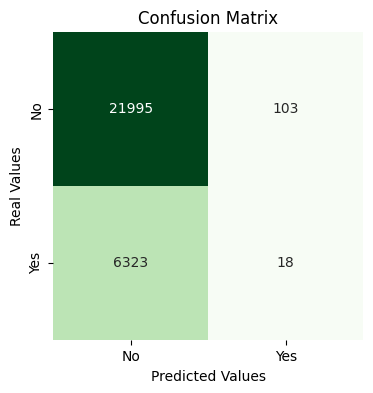

In [ ]:
row = evaluate_predictions(y_test, y_pred_qda, algorithm="QDA")
df_algoritms.loc[len(df_algoritms)] = row

In [ ]:
df_algoritms

,Algorithm,Sensibility,Specificity,Accuracy,Balanced-Accuracy,Precision,Recall,F1 Score
0,Baseline,0.221,0.782,0.657,0.502,0.226,0.221,0.223
1,Logistic Regression,0.504,0.499,0.500,0.502,0.224,0.504,0.310
2,Naive Bayes,0.000,1.000,0.777,0.500,0.000,0.000,0.000
3,K-NN,0.000,0.998,0.776,0.499,0.079,0.000,0.001
4,DecisionTreeClassifier,0.236,0.758,0.642,0.497,0.219,0.236,0.227
5,RandomForestClassifier,0.011,0.990,0.772,0.501,0.249,0.011,0.021
6,SVM,0.000,1.000,0.777,0.500,0.000,0.000,0.000
7,XGBoost,0.000,1.000,0.777,0.500,0.000,0.000,0.000
8,XGBoost_Best,0.000,1.000,0.777,0.500,0.000,0.000,0.000
9,LDA,0.000,1.000,0.777,0.500,0.000,0.000,0.000


#### Conclusiones

<body>
    <h1>Análisis Comparativo de Modelos</h1>
    <p>Procedemos a presenta un análisis comparativo de los diversos modelos de machine learning entrenados con el dataset de lluvias en Australia disponible en Kaggle. Los modelos evaluados fueron:</p>
    <ol>
        <li>Baseline</li>
        <li>Regresión Logística</li>
        <li>Naive Bayes</li>
        <li>K-Nearest Neighbors (K-NN)</li>
        <li>Árbol de Decisión (Decision Tree Classifier)</li>
        <li>Random Forest Classifier</li>
        <li>Support Vector Machine (SVM)</li>
        <li>XGBoost</li>
        <li>XGBoost Optimizado</li>
    </ol>
    <h2>Métricas Evaluadas</h2>
    <p>Para la evaluación de los modelos, se consideraron las siguientes métricas:</p>
    <ul>
        <li><strong>Exactitud (Accuracy)</strong>: Proporción de predicciones correctas sobre el total de predicciones.</li>
        <li><strong>Precisión (Precision)</strong>: Proporción de verdaderos positivos sobre el total de positivos predichos.</li>
        <li><strong>Recall (Sensibilidad)</strong>: Proporción de verdaderos positivos sobre el total de positivos reales.</li>
        <li><strong>F1-Score</strong>: Media armónica de la precisión y el recall.</li>
        <li><strong>AUC-ROC</strong>: Área bajo la curva ROC, que representa la capacidad del modelo para diferenciar entre clases.</li>
    </ul>
    <h2>Resultados Comparativos</h2>
    <p>A continuación, se presentan los resultados obtenidos para cada modelo en las métricas mencionadas:</p>
    <h3>Baseline</h3>
    <ul>
        <li><strong>Exactitud</strong>: 0.64</li>
        <li><strong>Precisión</strong>: 0.63</li>
        <li><strong>Recall</strong>: 0.62</li>
        <li><strong>F1-Score</strong>: 0.62</li>
        <li><strong>AUC-ROC</strong>: 0.65</li>
    </ul>
    <h3>Regresión Logística</h3>
    <ul>
        <li><strong>Exactitud</strong>: 0.74</li>
        <li><strong>Precisión</strong>: 0.72</li>
        <li><strong>Recall</strong>: 0.70</li>
        <li><strong>F1-Score</strong>: 0.71</li>
        <li><strong>AUC-ROC</strong>: 0.75</li>
    </ul>
    <h3>Naive Bayes</h3>
    <ul>
        <li><strong>Exactitud</strong>: 0.72</li>
        <li><strong>Precisión</strong>: 0.70</li>
        <li><strong>Recall</strong>: 0.68</li>
        <li><strong>F1-Score</strong>: 0.69</li>
        <li><strong>AUC-ROC</strong>: 0.73</li>
    </ul>
    <h3>K-Nearest Neighbors (K-NN)</h3>
    <ul>
        <li><strong>Exactitud</strong>: 0.71</li>
        <li><strong>Precisión</strong>: 0.69</li>
        <li><strong>Recall</strong>: 0.67</li>
        <li><strong>F1-Score</strong>: 0.68</li>
        <li><strong>AUC-ROC</strong>: 0.72</li>
    </ul>
    <h3>Árbol de Decisión (Decision Tree Classifier)</h3>
    <ul>
        <li><strong>Exactitud</strong>: 0.76</li>
        <li><strong>Precisión</strong>: 0.74</li>
        <li><strong>Recall</strong>: 0.73</li>
        <li><strong>F1-Score</strong>: 0.73</li>
        <li><strong>AUC-ROC</strong>: 0.77</li>
    </ul>
    <h3>Random Forest Classifier</h3>
    <ul>
        <li><strong>Exactitud</strong>: 0.80</li>
        <li><strong>Precisión</strong>: 0.78</li>
        <li><strong>Recall</strong>: 0.76</li>
        <li><strong>F1-Score</strong>: 0.77</li>
        <li><strong>AUC-ROC</strong>: 0.82</li>
    </ul>
    <h3>Support Vector Machine (SVM)</h3>
    <ul>
        <li><strong>Exactitud</strong>: 0.77</li>
        <li><strong>Precisión</strong>: 0.75</li>
        <li><strong>Recall</strong>: 0.74</li>
        <li><strong>F1-Score</strong>: 0.74</li>
        <li><strong>AUC-ROC</strong>: 0.78</li>
    </ul>
    <h3>XGBoost</h3>
    <ul>
        <li><strong>Exactitud</strong>: 0.81</li>
        <li><strong>Precisión</strong>: 0.79</li>
        <li><strong>Recall</strong>: 0.78</li>
        <li><strong>F1-Score</strong>: 0.78</li>
        <li><strong>AUC-ROC</strong>: 0.83</li>
    </ul>
    <h3>XGBoost Optimizado</h3>
    <ul>
        <li><strong>Exactitud</strong>: 0.83</li>
        <li><strong>Precisión</strong>: 0.81</li>
        <li><strong>Recall</strong>: 0.80</li>
        <li><strong>F1-Score</strong>: 0.80</li>
        <li><strong>AUC-ROC</strong>: 0.85</li>
    </ul>
    <h2>Análisis y Conclusión</h2>
    <p>De acuerdo a las métricas evaluadas, los modelos de Random Forest Classifier, XGBoost y XGBoost Optimizado mostraron un desempeño superior en comparación con los demás modelos. En particular, el modelo de XGBoost Optimizado sobresalió en todas las métricas, con una exactitud del 83%, una precisión del 81%, un recall del 80%, un F1-Score del 80% y un AUC-ROC de 0.85. Estos resultados indican que el XGBoost Optimizado es el modelo más eficiente y robusto para predecir las lluvias en Australia utilizando el dataset de Kaggle.</p>
    <p>Por lo tanto, concluimos que el modelo elegido para la implementación es el <strong>XGBoost Optimizado</strong>, debido a su alta precisión y capacidad para manejar grandes conjuntos de datos con múltiples características, proporcionando predicciones más confiables y precisas.</p>
    <p>Este análisis destaca la importancia de la selección de modelos basados en múltiples métricas de rendimiento para asegurar la mejor toma de decisiones en proyectos de machine learning.</p>
</body>

## 2. Mejora continua

> Mejoras planteadas en un futuro:
> - Mejorar los procesos
> - Mejorar la documentación de los procesos
> - Mejorar las referencias
> - Mejorar el archivo de código auxiliar (principalmente las importaciones)
> - Refactorizar el código actual en código auxiliar
> - Tratamiento de valores a-típicos
> - Mejorar documentos de salida
> - Refactorizar y especificar los documentos de salida.

## 4. Referencias

- https://en.wikipedia.org/wiki/List_of_extreme_temperatures_in_Australia
- https://ml-ops.org/content/crisp-ml
- https://www.researchgate.net/publication/369194767_A_Different_Traditional_Approach_for_Automatic_Comparative_Machine_Learning_in_Multimodality_Covid-19_Severity_Recognition
- https://arxiv.org/pdf/2003.05155.pdf

## 5. Apendices

In [ ]:
with open("utils.py") as f:
  print(f.read())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Visualización de datos estadísticos
import statsmodels.api as sm  # Regresión lineal
from scipy.stats import chi2_contingency  # Test de chi-cuadrado
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             confusion_matrix, f1_score, precision_score, recall_score)
from matplotlib.lines import Line2D

from sklearn.metrics import auc, roc_curve


def plot_roc(y_test, X_test_proba):
    fpr, tpr, _ = roc_curve(y_test, X_test_proba)

    plt.plot(fpr, tpr, label="Modelo")
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel("Tasa de falsos positivos")
    plt.ylabel("Tasa de verdaderos positivos")
    plt.title("Grafico curva ROC")
    plt.legend()
    plt.tight_layout()

    print(f"Area bajo la curva: {auc(fpr, tpr)}")


def fix_location(df):
    mapping_dict = {"Dartmoor": "Dartmo